#### Name  - Raj Kulhade
#### Qualification - Full Stack Python & DataScience [NareshIT], DataScience Bootcamp [Ongoing]
#### SKills - Python , SQL , *Machine Learning* , Power-BI (Begineer)

# Predicting Diabetes & Relation Between Traits [ EDA & ML ]

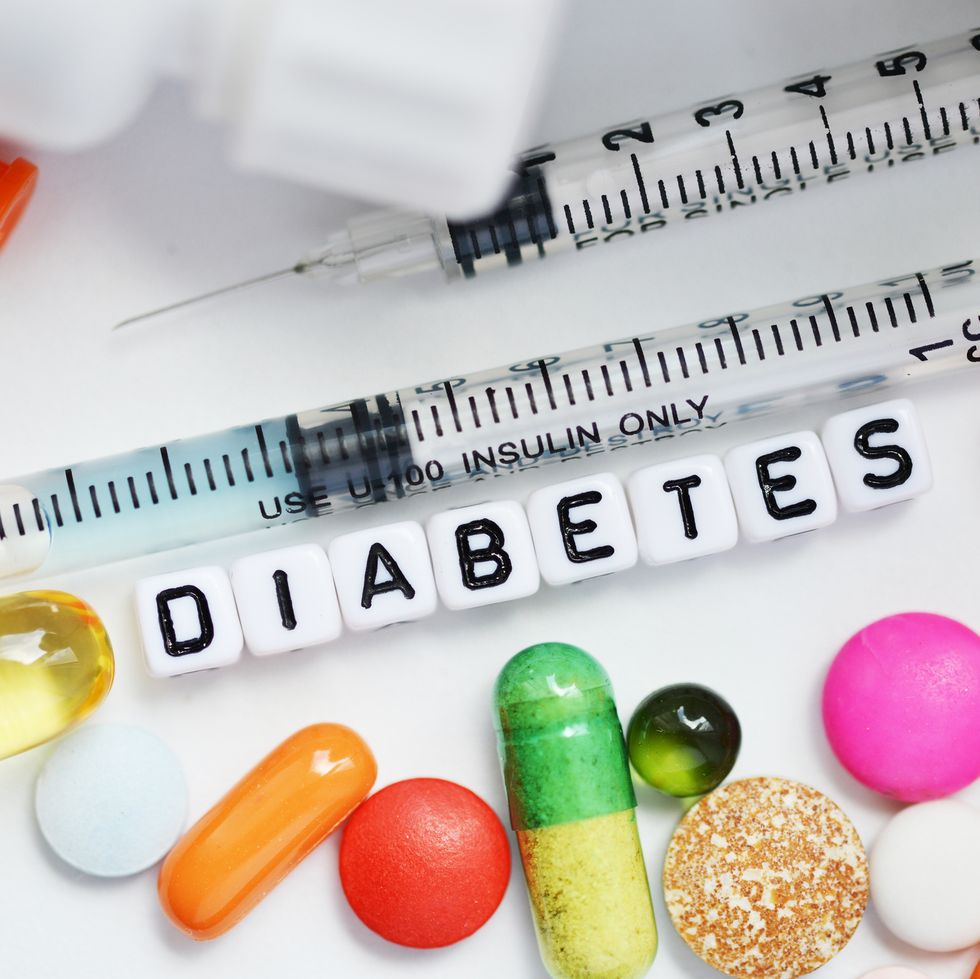# 1. Why is Diabetes a Challenge?
####  "Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high . Insulin, a hormone made by the pancreas. Sometimes your body doesn’t make enough—or any—insulin or doesn’t use insulin well

### Types of Diabetes?
* **Type 1 Diabetes** In this your body does not make Insulin. Immune system attacks and destroy the cells in your pancreas that make insulin. People who have Type 1 diabetes that to take Insulin everyday.
- **Type 2 Diabetes** This is most common type of diabetes , In this body doesnot use Insulin well
* **Gestational Diabetes** devlops in some women when they are pregnant , this diabetes goes away when the baby is born . If you have gestational diabetes there are chances you can devlop type 2 diabetes
* **Other type of Diabetes** This type  is inherited form of diabetes.

#### Why its a challenge Mean!
* **Blood Clotting in Body** - There wound or Any cut takes a very long time to heal

* **This will effect every organ differenly** - Cataract formation in eyes, kidney Failure , heart stokes and Anemia (Low blood Cell Count) and High Blood pressure
#### ============================================

# 2. What are the major factors associated with diabetes?

* **Obesity or being overweight** -   This is a top reason for type 2 diabetes

* **Not Pysically Active**
* **Age above 35**
* **Inherited from Genitics**
#### ============================================

# 3.Your aim in this study? 
* Providing the proper visualization with the Nescessary feature for better Understanding of Data
* Dataset should be ready for the Machine Learning Models
* Any one who is viewing this ipynb should be able to understand How and Why we did the Particluar Thing!
#### ============================================

In [41]:
# importing the Module that will be handy while analysing the dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
import plotly.express as px
import  warnings
import missingno as mn
warnings.filterwarnings("ignore")

#### Code to represent borders and Edges

%%HTML
<style type="text/css">
table.dataframe td,table.dataframe th {
    border: 1px white solid !important;
    color: white !important;
}
<style>

#### Insights:
* This helps us to get the borders , edges which is good for the visualization Part

In [42]:
Diabetes_raw = pd.read_csv(r"C:\Users\EXPERT\Desktop\All Files of Desktop\Odin school\Projects\Diabetes Project\Diabetes Dataset\diabetes.csv",encoding="Unicode_escape")
#Reading the csv file using the pd.read_csv function and using the parameter
#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 0: invalid start byte
#unicode_escape' is for producing an ascii encoding of the Unicode string that can be read as a string literal by Python

In [43]:
# We are Creating a Copy of our DataSet if something goes wrong afterward we can continue with the Diabetes_raw
diabetes = Diabetes_raw.copy() 
diabetes.head() # viewing the first 5 rows of the Dataset

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Insights:
**1.Pregnancies: Number of times pregnant**

**2.Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test**

**3.Blood Pressure: Diastolic blood pressure (mm Hg)**

**4.Skin Thickness: Triceps skin fold thickness (mm)**

**5.Insulin: 2-Hour serum insulin (mu U/ml)**

**6.BMI: Body mass index (weight in kg/(height in m)^2)**

**7.Diabetes Pedigree Function: Diabetes history of Ancestors**

**8.Age: Age (years)**

**9.Outcome: Class variable (0 or 1) 0 mean Non-diabetic and 1 means Diabetic**

## 1- Basic Exploration and Cleaning up

### Missing and Zero Values
* It is clear the data has Missing Values in the Form of ZERO.
* For Example , We can see SkinThickness = 0 & and Insulin = 0 in first three rows.
* Lets get more info.

In [44]:
diabetes.tail() # To view the last 5 using this function if we want to view more we can enter the number inside the brackets and can get the Last no. of rows as specified

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


### Insights:
* Here also we can have a look in SkinThickness and Insulin Values are 0.

In [45]:
diabetes.info() # info() function tells us about the Non-Null values their data types and Field Names

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0    Pregnancies                768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood Pressure              768 non-null    int64  
 3   Skin Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5    BMI                        768 non-null    float64
 6   Diabetes Pedigree Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Viewing more details about the data
* we can use the **describe** function and it will give us more detail about the numeric columns

In [46]:
diabetes.describe() #Describe function tells us the mean,std,min,max

,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Insights:
* In **Pregnancy Column** I dont see any Errors or Unusal activity.
* In **Glucose Column** [Minimum = 0] which is not possible,Blood sugar below 70 mg/dL (3.9 mmol/L) is considered low. Blood sugar at or below this level can be harmful.
* In **BloodPressure Column** [Minimum = 0] , Blood Pressure can never get to 0 and Even the dead Person will still have the hydrostatic blood pressure due to gravitation Pull.
* **SkinThickness** Can never be Zero.
* **Insulin** level can never be Zero
* **BMI , Age , DiabetesPedigreeFunction , Outcome** I don't see any Errors yet.

In [48]:
#Lets rename the Column names there are spaces in between the column names
for i in (diabetes.columns):
    print(i) 
    #set_axis works as the renaming of columns
diabetes =  diabetes.set_axis(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness',
       'Insulin', 'BMI', 'Diabetes_Pedigree_Function', 'Age', 'Outcome'], axis='columns') 
print("-"*25)
for i in diabetes.columns:
    print(i)


 Pregnancies
Glucose
Blood Pressure
Skin Thickness
Insulin
 BMI
Diabetes Pedigree Function
Age
Outcome
-------------------------
Pregnancies
Glucose
Blood_Pressure
Skin_Thickness
Insulin
BMI
Diabetes_Pedigree_Function
Age
Outcome


#### Insights:
**As we are able to see there are spaces in Pregnanies and BMI and spaces in between the Blood_Pressure, Skin_Thickness and Diabetes_Pedigree_Function which needs to get resolved**

## Dealing with Zero Values 

#### As **Blood_Pressure , Glucose ,Skin_Thickness and Insulin** can never be *ZERO* so we will convert them into NaN values

In [49]:
diabetes_zero = diabetes.copy()

In [50]:
diabetes_four = diabetes_zero[["Blood_Pressure","Glucose","Skin_Thickness","Insulin"]] #Taking this four column as another dataset as they contains zero in them
diabetes_four.replace(0,np.NaN,inplace=True) # using the replace Function to convert 0 To NaN values

print((diabetes_four.isna().sum()/768)*100) # viewing the percentage of Null Values found.

diabetes_four.drop("Insulin" , axis=1 , inplace=True) # as Insulin Null Value Percentage is approx 50% , Removing the column can be a good Approach **Feature selection**

diabetes_zero = diabetes_zero.drop(["Insulin","Glucose","Blood_Pressure","Skin_Thickness"],axis=1)
diabetes_zero = pd.concat([diabetes_zero,diabetes_four],axis=1)

# Rearranging the Columns so that our Independent and Dependent columns should look in the proper Manner
diabetes_zero = diabetes_zero[["Pregnancies","Glucose","Blood_Pressure","Skin_Thickness","BMI"
          ,"Diabetes_Pedigree_Function","Age","Outcome"]]
diabetes = diabetes_zero.copy()
diabetes

Blood_Pressure     4.557292
Glucose            0.651042
Skin_Thickness    29.557292
Insulin           48.697917
dtype: float64


,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.0,35.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,30.1,0.349,47,1


#### Insights:
* first we took the copy of the dataset.
* created a New Dataframe of four columns where zero values should be Considered as NaN
* Replacing the 0 value with NaN using the pd.replace Function
* Getting the view of **Missing Value % In the Columns** 
* As Insulin Null Values Percentage is approx 50%, We will drop the Insulin column
* We will use the **Imputation Technique** in Skin_Thickness & Blood_Pressure column.
* As Glucose Null percentage is less 1%, We will drop the Rows using dropna() function.


In [51]:
print("Totoal Rows in our Dataset : ",len(diabetes))
print("-"*50)
print("Null values in Glucose : ",diabetes.Glucose.isnull().sum())
print("-"*50)
diabetes.dropna(subset=["Glucose"],inplace=True) 
print("Remaining Values in the Dataset" , (len(diabetes)))

Totoal Rows in our Dataset :  768
--------------------------------------------------
Null values in Glucose :  5
--------------------------------------------------
Remaining Values in the Dataset 763


#### insights:
* As Null Value Percentage in Glucose were less then 1% we have dropped the Rows having it.

In [52]:
diabetes.isnull().sum()

Pregnancies                     0
Glucose                         0
Blood_Pressure                 35
Skin_Thickness                227
BMI                             0
Diabetes_Pedigree_Function      0
Age                             0
Outcome                         0
dtype: int64

#### Insights:
* We have Null Values in Blood_Pressure and in Skin_Thickness 
* We will use the **Imputation Techniques** in it.

<Axes: >

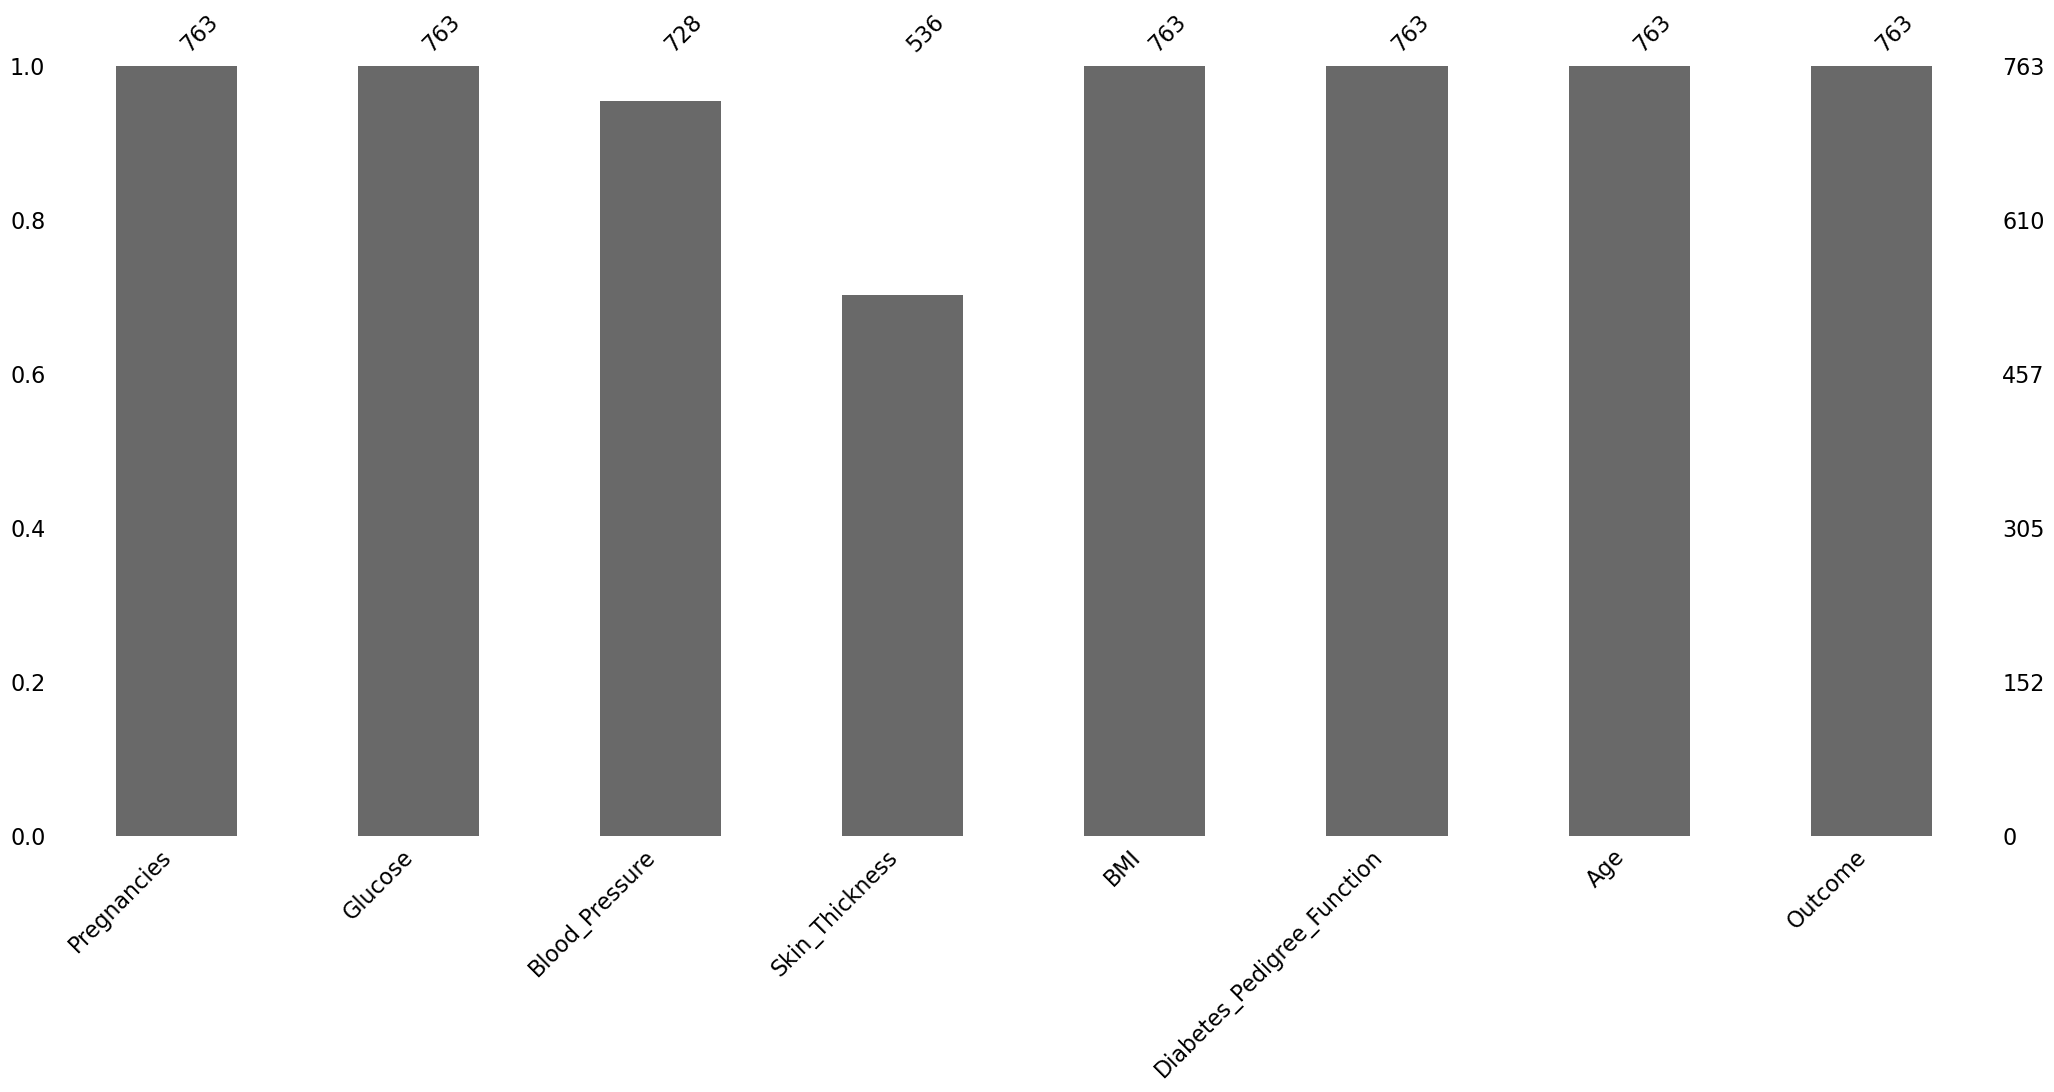

In [53]:
mn.bar(diabetes)

<Axes: >

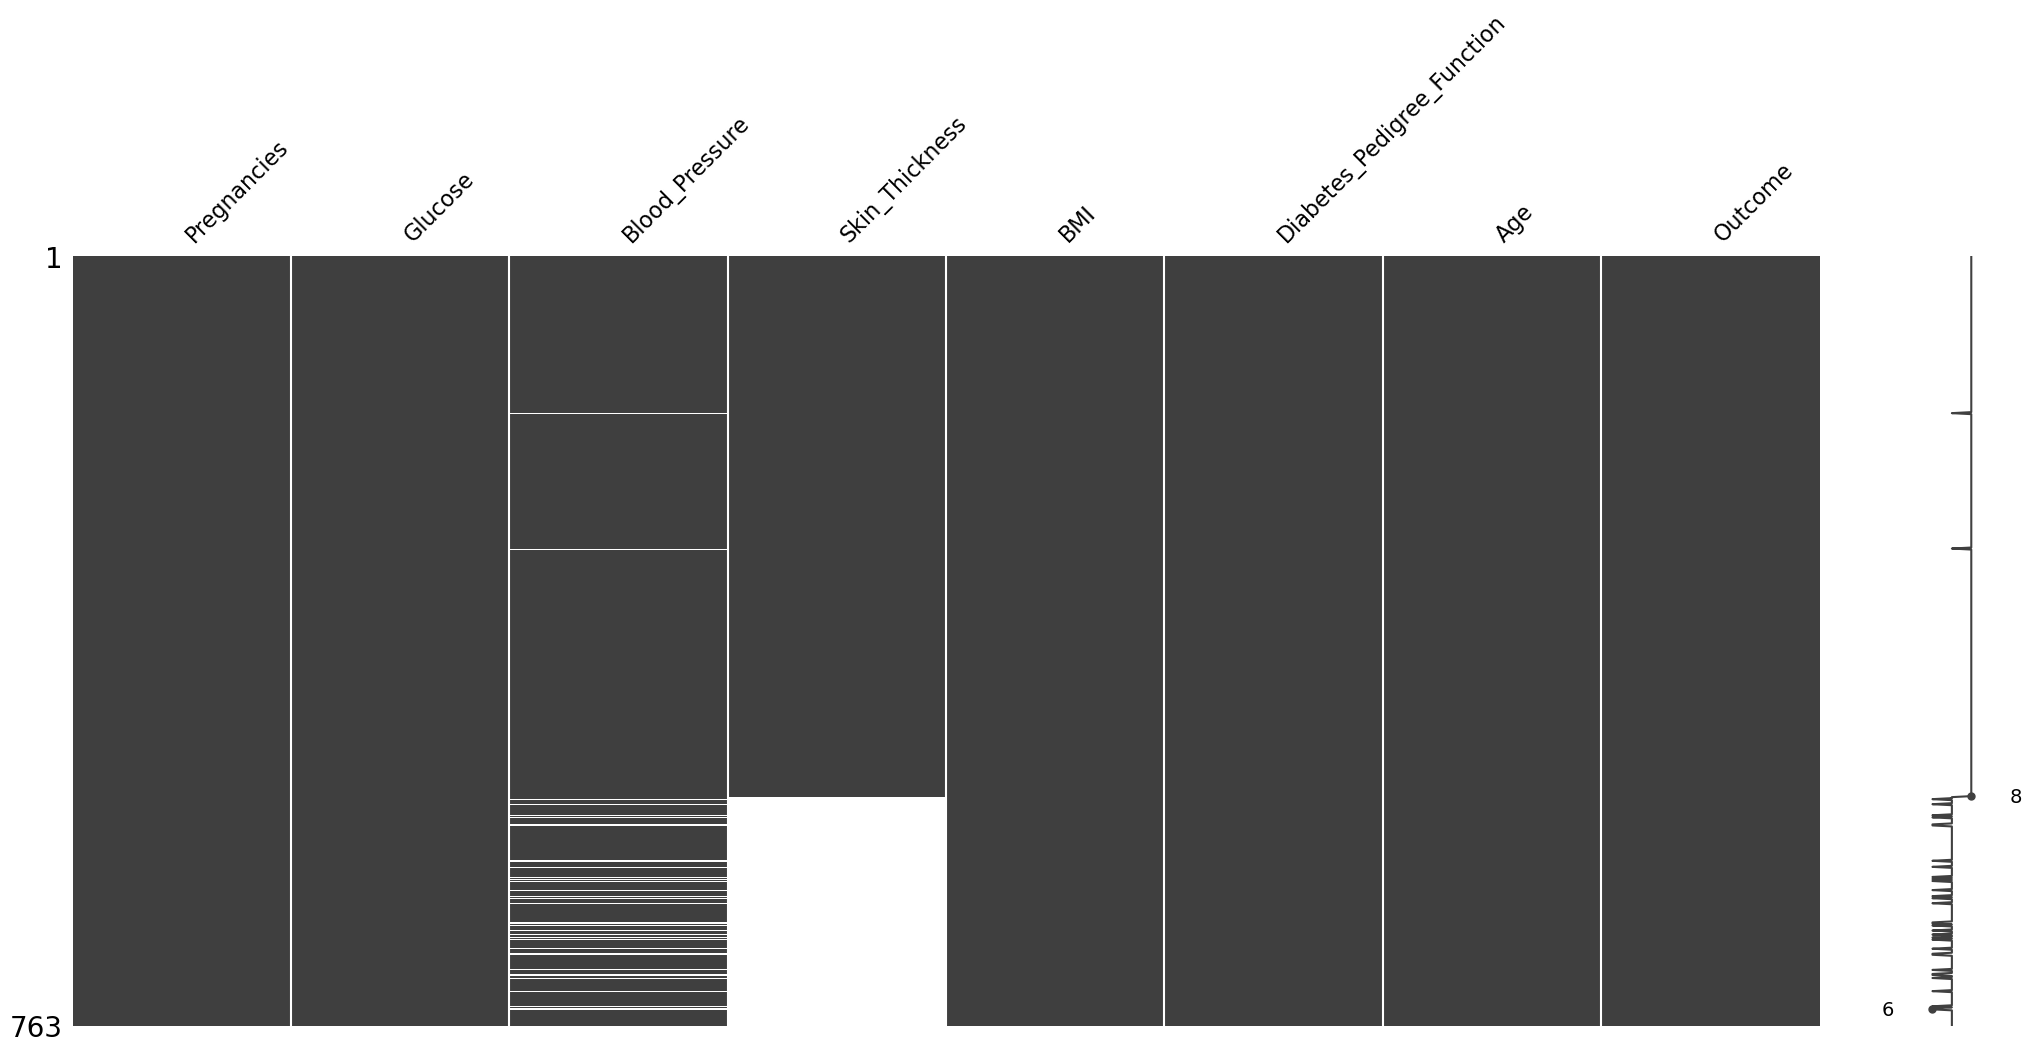

In [54]:
sorted = diabetes.sort_values('Skin_Thickness')
mn.matrix(sorted)

#### Insights:
* It seems that there is a Clear Relationship between Skin_Thickness and Blood_Pressure

In [55]:
(diabetes[["Blood_Pressure","Skin_Thickness"]]).head(10)

,Blood_Pressure,Skin_Thickness
0,72.0,35.0
1,66.0,29.0
2,64.0,NaN
3,66.0,23.0
4,40.0,35.0
5,74.0,NaN
6,50.0,32.0
7,NaN,NaN
8,70.0,45.0
9,96.0,NaN


## Baisc imputation Techniques

#### Mean Imputation

In [56]:
from sklearn.impute import SimpleImputer
diabetes_mean = diabetes.copy() # creating a copy for further evaluation
mean_imputer = SimpleImputer(strategy='mean')
diabetes_mean.iloc[:, :] = mean_imputer.fit_transform(diabetes_mean)
print("Blood_Pressure Mean:",diabetes_mean["Blood_Pressure"].mean())
print("-"*50)
print("Skin_Thickness Mean:",diabetes_mean["Skin_Thickness"].mean())
(diabetes_mean[["Blood_Pressure","Skin_Thickness"]]).head(10)

Blood_Pressure Mean: 72.43818681318682
--------------------------------------------------
Skin_Thickness Mean: 29.14925373134328


,Blood_Pressure,Skin_Thickness
0,72.000000,35.000000
1,66.000000,29.000000
2,64.000000,29.149254
3,66.000000,23.000000
4,40.000000,35.000000
5,74.000000,29.149254
6,50.000000,32.000000
7,72.438187,29.149254
8,70.000000,45.000000
9,96.000000,29.149254


In [57]:
diabetes_median = diabetes.copy() # creating a copy for further evaluation
median_imputer = SimpleImputer(strategy='median')
diabetes_median.iloc[:, :] = median_imputer.fit_transform(diabetes_median)
print("Blood_Pressure Median:",diabetes_median["Blood_Pressure"].median())
print("-"*50)
print("Skin_Thickness Median:",diabetes_median["Skin_Thickness"].median())
(diabetes_median[["Blood_Pressure","Skin_Thickness"]]).head(10)

Blood_Pressure Median: 72.0
--------------------------------------------------
Skin_Thickness Median: 29.0


,Blood_Pressure,Skin_Thickness
0,72.0,35.0
1,66.0,29.0
2,64.0,29.0
3,66.0,23.0
4,40.0,35.0
5,74.0,29.0
6,50.0,32.0
7,72.0,29.0
8,70.0,45.0
9,96.0,29.0


### Advance Imputation techniques

In [58]:
diabetes_mode = diabetes.copy() # creating a copy for further evaluation
mode_imputer = SimpleImputer(strategy='most_frequent')
diabetes_mode.iloc[:, :] = mode_imputer.fit_transform(diabetes_mode)
print("Blood_Pressure mode:",diabetes_mode["Blood_Pressure"].mode())
print("-"*50)
print("Skin_Thickness Median:",diabetes_mode["Skin_Thickness"].mode())
(diabetes_mode[["Blood_Pressure","Skin_Thickness"]]).head(10)

Blood_Pressure mode: 0    70.0
Name: Blood_Pressure, dtype: float64
--------------------------------------------------
Skin_Thickness Median: 0    32.0
Name: Skin_Thickness, dtype: float64


,Blood_Pressure,Skin_Thickness
0,72.0,35.0
1,66.0,29.0
2,64.0,32.0
3,66.0,23.0
4,40.0,35.0
5,74.0,32.0
6,50.0,32.0
7,70.0,32.0
8,70.0,45.0
9,96.0,32.0


### Advance Imputation techniques

In [59]:
from fancyimpute import KNN
knn_imputer = KNN()
diabetes_KNN = diabetes.copy()
diabetes_KNN.iloc[:, :] = knn_imputer.fit_transform(diabetes_KNN)
(diabetes_KNN[["Blood_Pressure","Skin_Thickness"]]).head(10)

Imputing row 1/763 with 0 missing, elapsed time: 0.181
Imputing row 101/763 with 1 missing, elapsed time: 0.189
Imputing row 201/763 with 0 missing, elapsed time: 0.189
Imputing row 301/763 with 0 missing, elapsed time: 0.189
Imputing row 401/763 with 1 missing, elapsed time: 0.196
Imputing row 501/763 with 1 missing, elapsed time: 0.197
Imputing row 601/763 with 0 missing, elapsed time: 0.198
Imputing row 701/763 with 0 missing, elapsed time: 0.198


,Blood_Pressure,Skin_Thickness
0,72.000000,35.000000
1,66.000000,29.000000
2,64.000000,26.464588
3,66.000000,23.000000
4,40.000000,35.000000
5,74.000000,19.939565
6,50.000000,32.000000
7,77.173434,34.680279
8,70.000000,45.000000
9,96.000000,18.829795


In [60]:
from fancyimpute import IterativeImputer
MICE_imputer = IterativeImputer()
diabetes_MICE = diabetes.copy(deep=True)
diabetes_MICE.iloc[:, :] = MICE_imputer.fit_transform(diabetes_MICE)
(diabetes_MICE[["Blood_Pressure","Skin_Thickness"]]).head(10)

,Blood_Pressure,Skin_Thickness
0,72.000000,35.000000
1,66.000000,29.000000
2,64.000000,22.282847
3,66.000000,23.000000
4,40.000000,35.000000
5,74.000000,22.657585
6,50.000000,32.000000
7,72.750632,31.317878
8,70.000000,45.000000
9,96.000000,2.561663


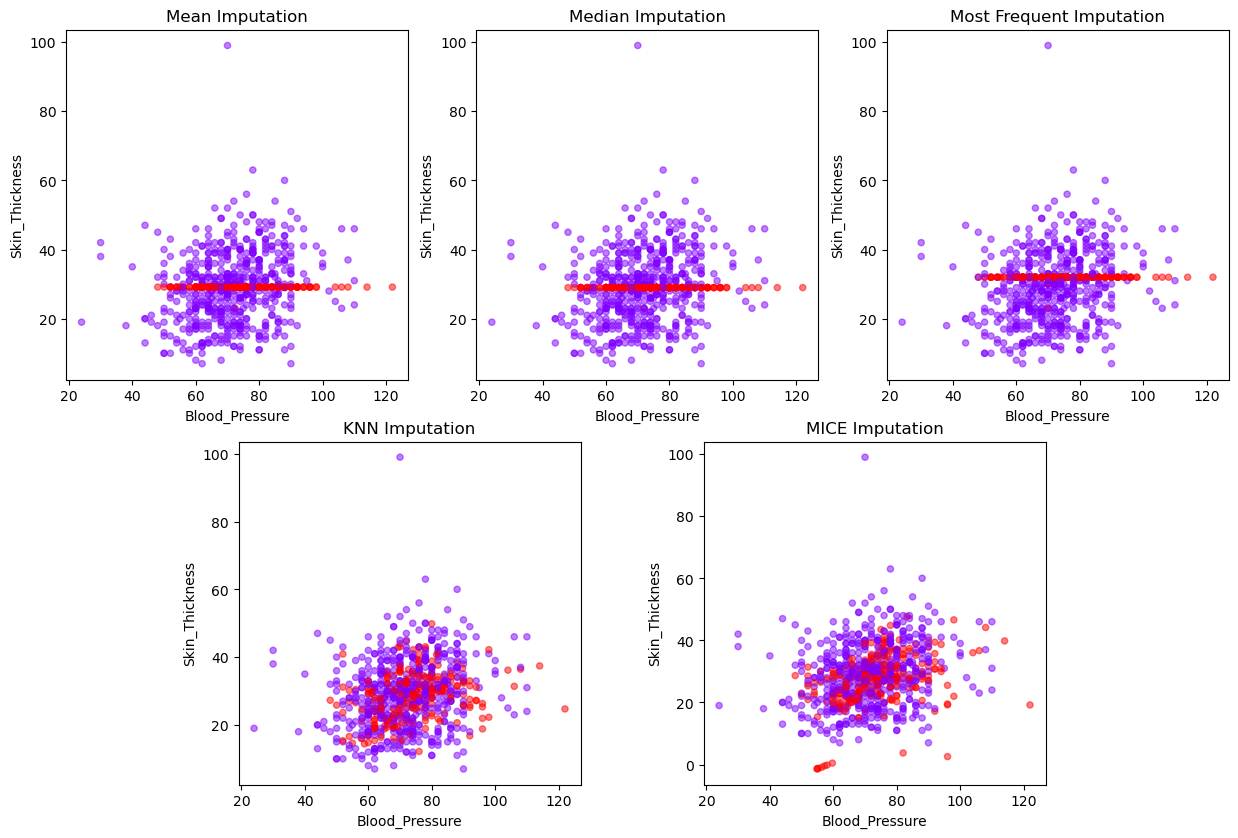

In [61]:
fig, axes = plt.subplots(2,3, figsize=(15,10))
axes[1][2].set_visible(False)

axes[1][0].set_position([0.24,0.125,0.228,0.343])
axes[1][1].set_position([0.55,0.125,0.228,0.343])
nullity = diabetes['Blood_Pressure'].isnull() + diabetes['Skin_Thickness'].isnull()
imputations = {'Mean Imputation': diabetes_mean,
               'Median Imputation': diabetes_median,
               'Most Frequent Imputation': diabetes_mode,
               'KNN Imputation': diabetes_KNN,
              'MICE Imputation': diabetes_MICE}

for ax, df_key in zip(axes.flatten(), imputations):
    imputations[df_key].plot(x='Blood_Pressure', y='Skin_Thickness', kind='scatter',
                             alpha=0.5, c=nullity, cmap='rainbow', ax=ax,
                             colorbar=False, title=df_key)

## Insights:
* As Clearly Visible from the Visualization above KNN imputation is very well Handling the Missing values in the Good way as compared to all the others
* We have not considered the MICE Imputation because some values we can see are so far as compared to our KNN imputation

In [62]:
diabetes = diabetes_KNN.copy(deep=True)

In [63]:
diabetes.groupby("Outcome").mean()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,Diabetes_Pedigree_Function,Age
Outcome,,,,,,,
0,3.311871,110.643863,70.878007,27.095887,30.317304,0.430662,31.247485
1,4.860902,142.319549,75.285459,32.532470,35.106015,0.550605,37.052632


   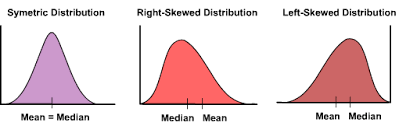

In [64]:
# The Difference between the mean is a good indicator of how much skewed the data is!
diabetes.groupby("Outcome").agg(['mean','median'])

Pregnancies            Glucose        Blood_Pressure         \
               mean median        mean median           mean median   
Outcome                                                               
0          3.311871    2.0  110.643863  107.0      70.878007   70.0   
1          4.860902    4.0  142.319549  140.0      75.285459   74.0   

        Skin_Thickness               BMI        Diabetes_Pedigree_Function  \
                  mean median       mean median                       mean   
Outcome                                                                      
0            27.095887   27.0  30.317304   30.1                   0.430662   
1            32.532470   32.0  35.106015   34.2                   0.550605   

                      Age         
        median       mean median  
Outcome                           
0        0.336  31.247485   27.0  
1        0.449  37.052632   36.0

#### Insights:
* In **Pregnancies** Column Mean > Median , Our data is **Right Skewed""
* In **Glucose** Column Mean > Median , Our data is **Right Skewed**
* In **Blood_Pressure** Column Mean = Median (Slightly) , Our data is **Symetrical or Normally Distributes**
* In **Skin_Thickness** Column Mean = Median (Slightly) , Our data is **Symetrical or Normally Distributes**
* In **BMI** Column Mean = Median (Slightly) , Our data is **Symetrical or Normally Distributes**
* In **Diabetes_Pedigree_Function** Column Mean > Median (Slightly) , Our data is **Slightly Right Skewed**
* In **Glucose** Column Mean > Median , Our data is **Right Skewed**

# 2. Data Visualization of Diabetes Data

### Histogram Plots (Univariate Analysis)

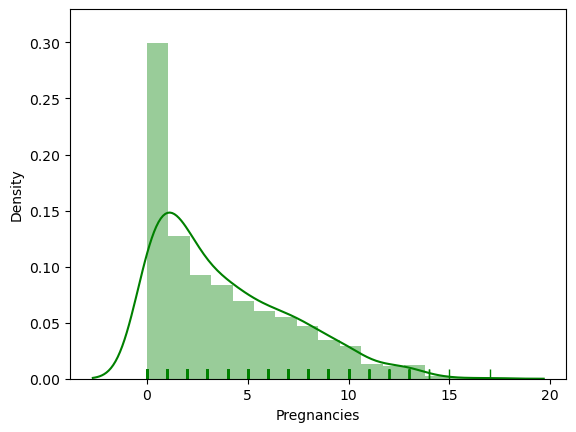

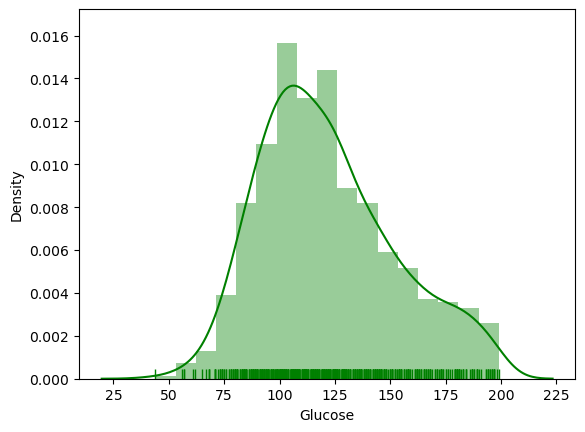

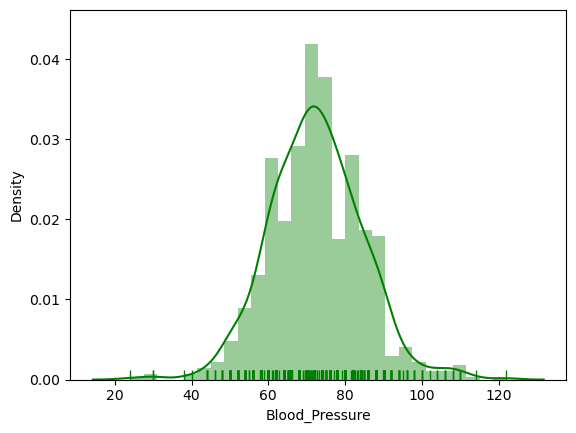

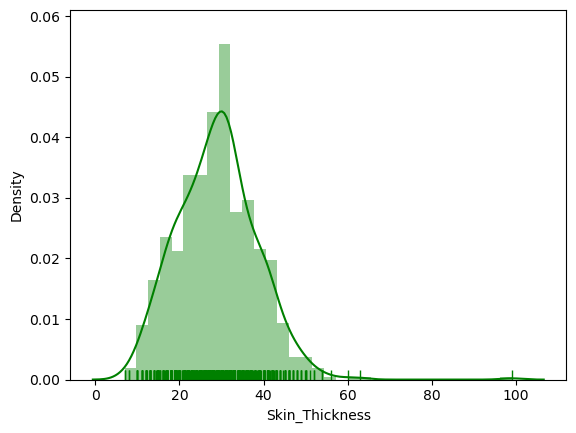

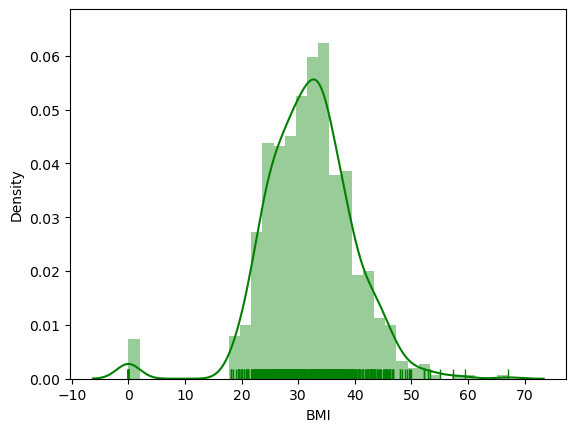

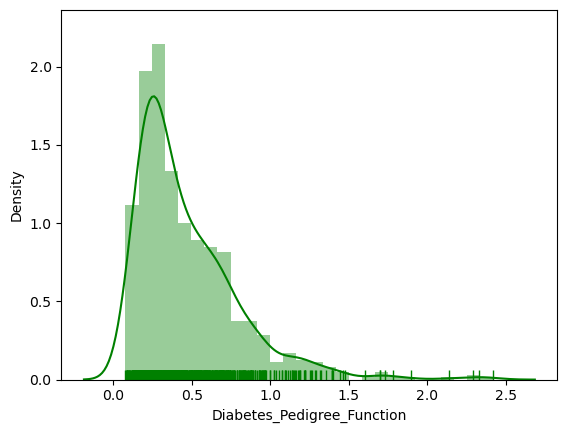

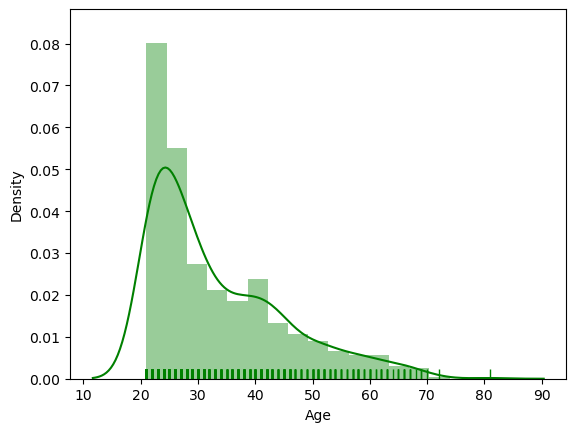

In [65]:
for i in diabetes.columns[:-1]:
    plt.figure(i)
    sns.distplot(diabetes[i],color="g",rug=True,kde=True) 
    #kernal density estimation
    #Rug= True it tell us where the data is concentrated

#### Scatter Matrix
* This one is useful one linear but note that it only works with Numeric data
* If you want to include Categorical Data in there you should convert the Categorical to numerical Labels.

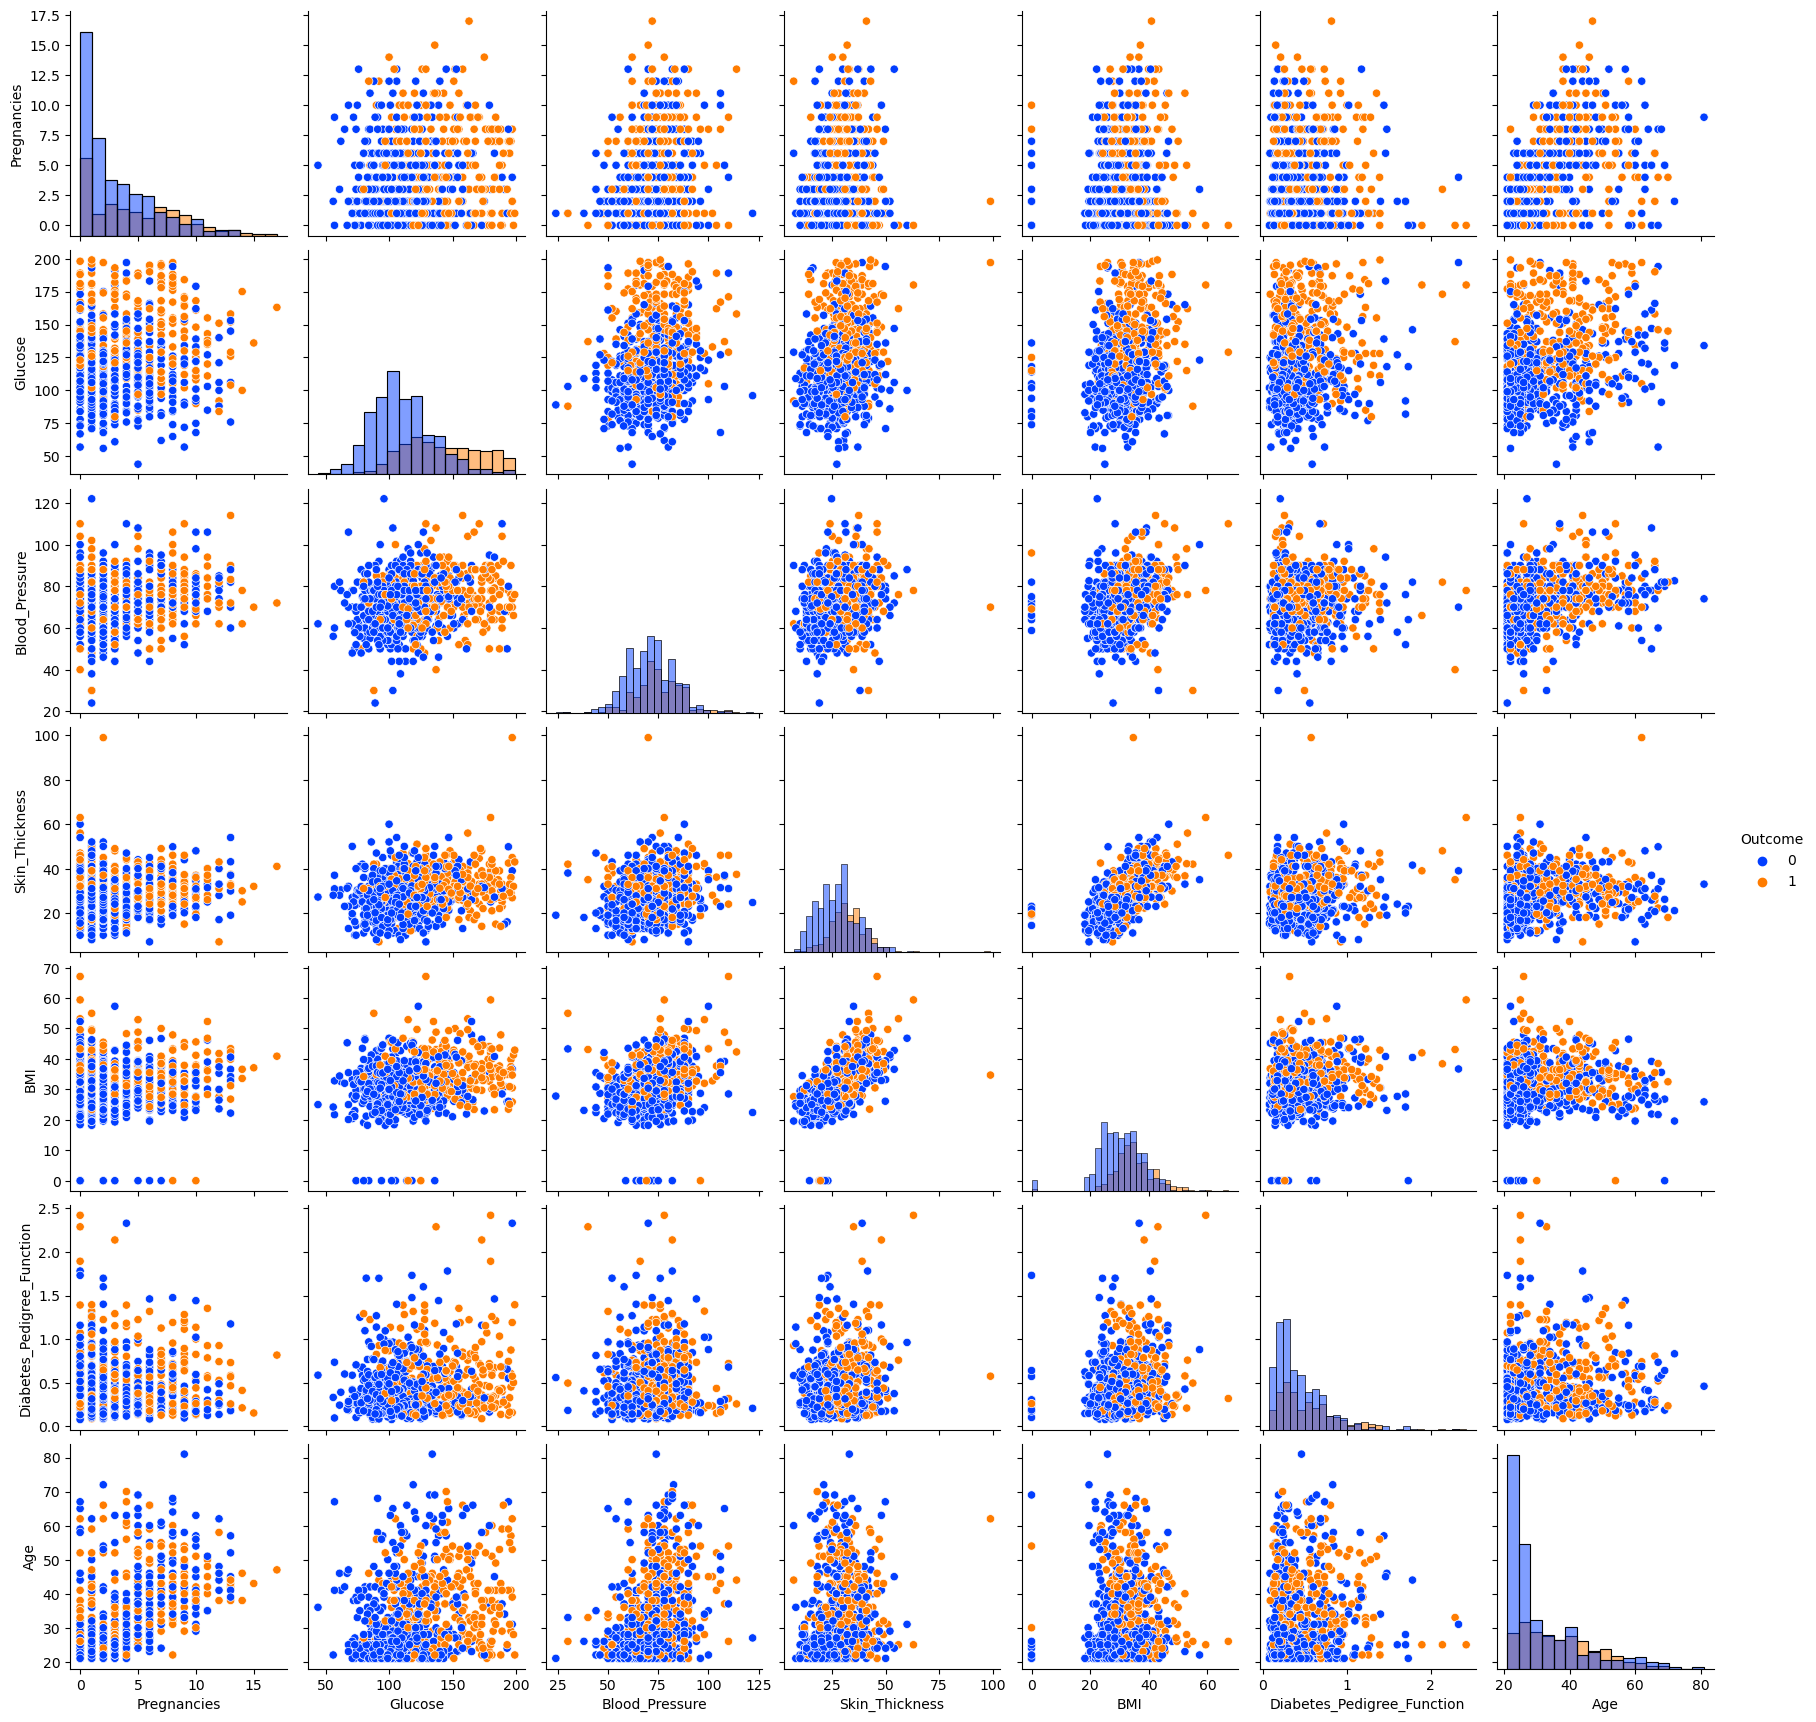

In [66]:
sns.pairplot(diabetes,hue="Outcome",diag_kind="hist",palette="bright");

#### Insights:
* Blue data is for diabetic people and Orange data is Diabetic People
- The scatter plot gives us the both the histogram for the distribution along the diagonal , and also a lot of 2D scatter plots off diagonals.Its a symmetric matrix.  
* We can see that there is a **Postive Co-Relation on BMI and Skin_Thickness**

# Co-Relation Plots

* To Easily identify which variables / attributes are Co-related with each other 

In [67]:
diabetes_corr = diabetes[['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'BMI',
       'Diabetes_Pedigree_Function', 'Age']]

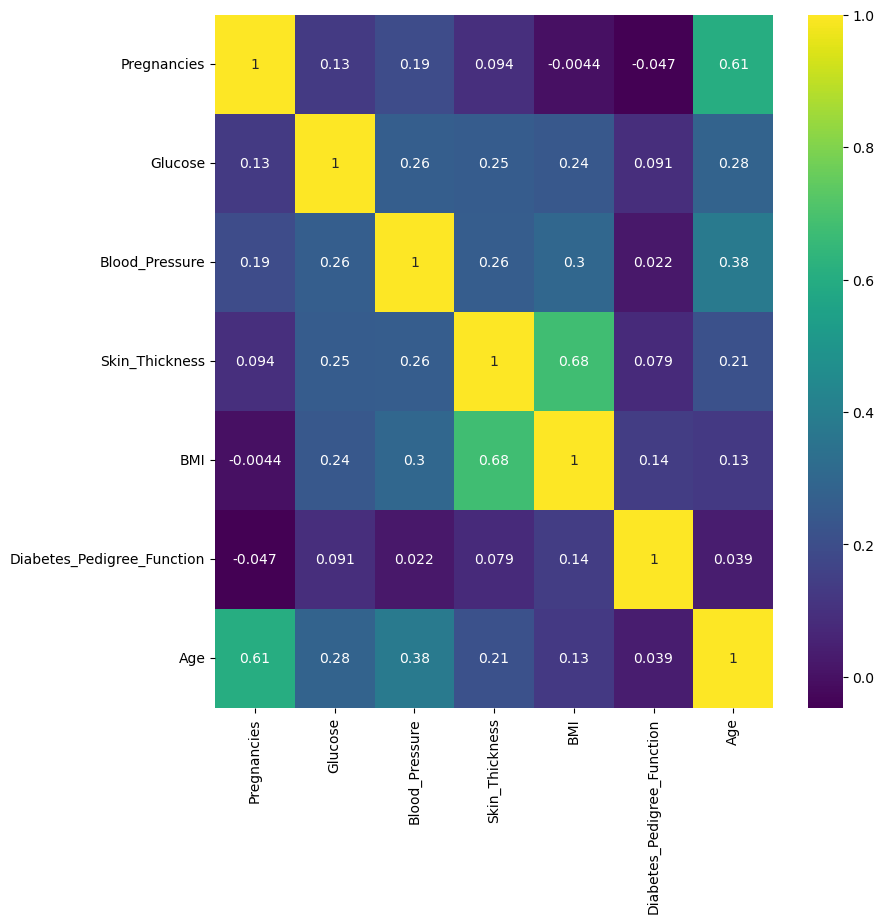

In [68]:
corr = diabetes_corr.corr(method = 'spearman')
plt.figure(figsize=(9,9))
sns.heatmap(corr, annot = True,cmap="viridis",)

plt.show()
# annot tells us the Co-Relation coefficient inside the box
# cmap is for color i have chosen the "viridis" because it was establing.

#### Insights:
* This is also the Symmatix Matrix .
- This allows us immediate to point out the highly Co-Related and Anti-Co-Related Attributes , Eg Pregnancy and Age , But some might gives us real insight of the data

# Boxplots and Bee Swarm plots

<Axes: xlabel='Outcome', ylabel='Glucose'>

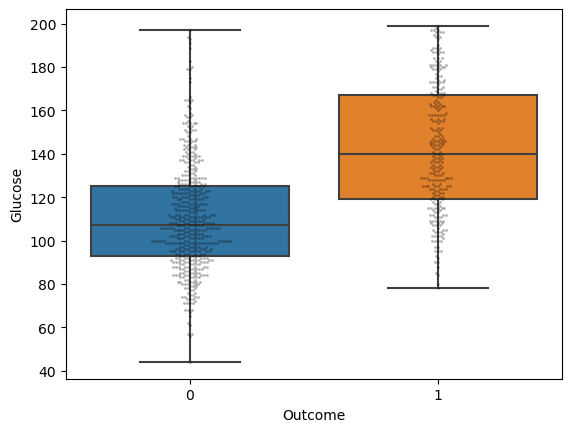

In [69]:
sns.boxplot(x="Outcome", y="Glucose",data=diabetes,whis=3.0)
sns.swarmplot(x="Outcome", y="Glucose",data=diabetes,size=2,color="k",alpha=0.3)

## Insights:
* The Blue Colored  Box Plot is of Non-Diabetic and Orange colored Box-Plot is of Diabetic we can see that **The Person who are Diabetic their Glucose Level is high as compared to Non-Diabetic People**


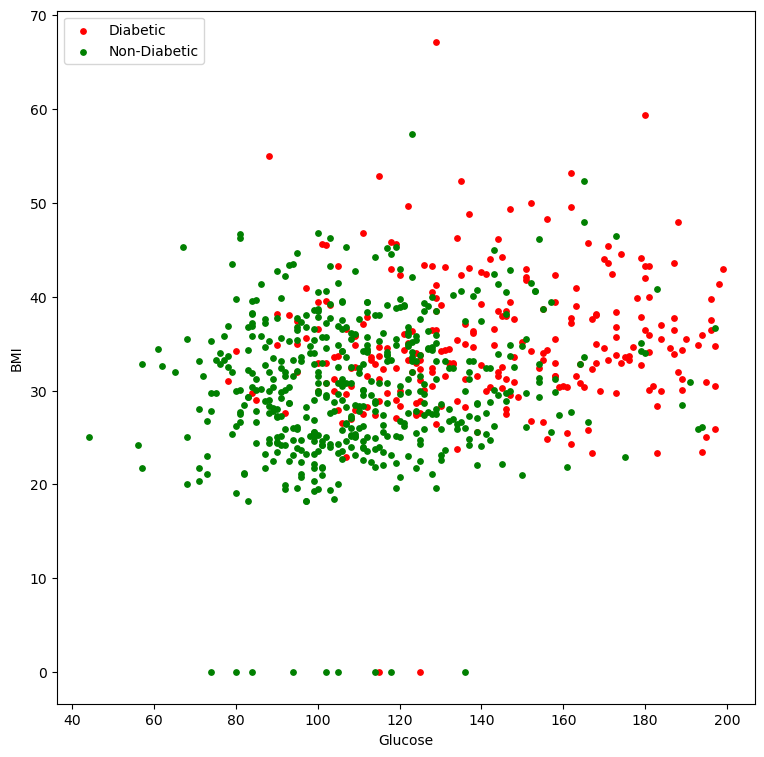

In [70]:
plt.figure(figsize=(9,9)) #setting up the Figute size so it should be accurate to us

m = diabetes["Outcome"] == 1 # Considering diabetic people as 1 
# with this Non-Diabetic = ~1 (Not 1)

plt.scatter(diabetes.loc[m,"Glucose"],diabetes.loc[m,"BMI"],c="r",s=15,label ="Diabetic")
#Taking glucose in X-Axis and BMI in y Axis for diabetic 
#people with the color Red

plt.scatter(diabetes.loc[~m,"Glucose"],diabetes.loc[~m,"BMI"],c="g",s=15,label ="Non-Diabetic")
#Taking glucose in X-Axis and BMI in y Axis for Non-diabetic 
#people with the color Green

plt.xlabel("Glucose") #Labelling the x Axis
plt.ylabel("BMI") # Labelling the Y Axis
plt.legend(loc=2) # its for the show of the Variable
plt.show () # for showing the plot

#### Insights:
* The **Green DataPoints represents the Non-Diabetic** 
* The **Red   Datapoints represents the     Diabetic**
* This is the Scatter plot of the **BMI V/S Glucose**
* As from this plot we can predict the if the person is Diabetic or Non diabetic by their BMI and Glucose Level


In [73]:
diabetes

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,Diabetes_Pedigree_Function,Age,Outcome
0,6,148.0,72.0,35.000000,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,26.6,0.351,31,0
2,8,183.0,64.0,26.464588,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,26.2,0.245,30,0
766,1,126.0,60.0,32.886413,30.1,0.349,47,1


In [76]:
diabetes.to_csv("C:\\Users\\EXPERT\\Desktop\\All Files of Desktop\\Odin school\\your_file.csv", index=False)

#### Both the Age and BMI are Ordinal level Lets do the Encoding part using the Scikit Library

In [71]:
diabetes_Encoding = diabetes.copy() # Taking a copy of dataset to avoid further errors

In [72]:
from sklearn.preprocessing import OrdinalEncoder # from module importing the sub-Module 
oe = OrdinalEncoder() #Condidering oe as a alias name for OrdianlEncoder

In [33]:
ary1 = oe.fit_transform(diabetes_Encoding[["Age"]]) #fir_transform converts the selected column to array hence we have to convert the array to dataframe

Encoded_Age = pd.DataFrame(ary1,columns=["New_Age"]) # converting the array to dataframe using the pd.Dataframe
ary2 = oe.fit_transform(diabetes_Encoding[["BMI"]])
Encoded_BMI = pd.DataFrame(ary2,columns=["New_BMI"])

diabetes_Encoding = pd.concat([diabetes_Encoding,Encoded_Age,Encoded_BMI],axis=1)

diabetes_Encoding.drop(["Age","BMI"],axis=1,inplace=True)

In [34]:
diabetes_Encoding

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Diabetes_Pedigree_Function,Outcome,New_Age,New_BMI
0,6.0,148.0,72.0,35.000000,0.627,1.0,29.0,123.0
1,1.0,85.0,66.0,29.000000,0.351,0.0,10.0,62.0
2,8.0,183.0,64.0,26.464588,0.672,1.0,11.0,30.0
3,1.0,89.0,66.0,23.000000,0.167,0.0,0.0,77.0
4,0.0,137.0,40.0,35.000000,2.288,1.0,12.0,208.0
...,...,...,...,...,...,...,...,...
75,NaN,NaN,NaN,NaN,NaN,NaN,20.0,115.0
182,NaN,NaN,NaN,NaN,NaN,NaN,19.0,72.0
342,NaN,NaN,NaN,NaN,NaN,NaN,28.0,172.0
349,NaN,NaN,NaN,NaN,NaN,NaN,3.0,68.0


In [35]:
diabetes_Encoding.isnull().mean() * 100

Pregnancies                   0.651042
Glucose                       0.651042
Blood_Pressure                0.651042
Skin_Thickness                0.651042
Diabetes_Pedigree_Function    0.651042
Outcome                       0.651042
New_Age                       0.651042
New_BMI                       0.651042
dtype: float64

#### Insights:
* Any NA values will be NA in the result. Out of bounds values will be NA in the resulting Series or Categorical object.
* As we can see we have null values less than 1% so it can be deleted

In [36]:
diabetes = diabetes_Encoding.dropna()

In [37]:
diabetes.isnull().sum()

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Diabetes_Pedigree_Function    0
Outcome                       0
New_Age                       0
New_BMI                       0
dtype: int64

In [38]:
diabetes.rename(columns = {"New_Age":"Age",
                           "New_BMI":"BMI"
                          },inplace=True)

In [39]:
#Rearranging the DS for the better View
diabetes = diabetes[["Pregnancies","Glucose","Blood_Pressure","Skin_Thickness","BMI"
          ,"Diabetes_Pedigree_Function","Age","Outcome"]]

In [40]:
diabetes[diabetes["Pregnancies"] > 13]

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,BMI,Diabetes_Pedigree_Function,Age,Outcome
88,15.0,136.0,70.0,32.0,61.0,0.153,3.0,1.0
159,17.0,163.0,72.0,41.0,91.0,0.817,15.0,1.0
298,14.0,100.0,78.0,25.0,112.0,0.412,9.0,1.0
455,14.0,175.0,62.0,30.0,55.0,0.212,51.0,1.0


#### Insights:
* Pregnancies greater then 13 will have Diabetes That is for sure.

# Outlier Detection

<AxesSubplot:>

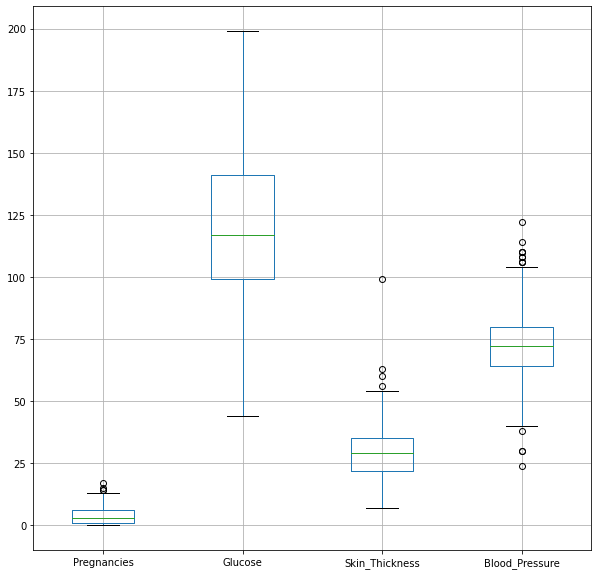

In [41]:
df = pd.DataFrame(data = diabetes, columns = ["Pregnancies","Glucose","Skin_Thickness",'Blood_Pressure'])
df.boxplot(figsize=(10,10))

#### Insights:
* There are NO Outliers to be found in the Glucose.
* There are Outliers to be found in Pregnancies , Skin_Thickness and Blood_Pressure

In [42]:
clist = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness']

In [43]:
def odiqr(df):
        q1 = df.quantile(0.25)
        q3 = df.quantile(0.75)
        iqr = q3 - q1
        low = q1 - (1.5 * iqr)
        high = q3 + (1.5 * iqr)
        m = df.mean()
        df = df.apply(lambda x : m if x < low else (m if x > high else x ) )
        return df

In [44]:
for i in clist:
    diabetes[i] = odiqr(df[i])

<AxesSubplot:>

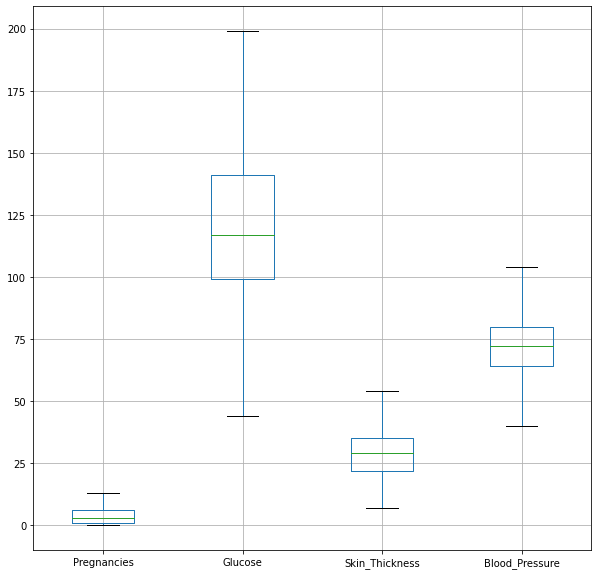

In [45]:
df = pd.DataFrame(data = diabetes, columns = ["Pregnancies","Glucose","Skin_Thickness","Blood_Pressure"])
df.boxplot(figsize=(10,10))

### Insights:
* Skewness is been reduced and Distribution Has become syymetric  Distribution.

In [46]:
from sklearn.ensemble import AdaBoostClassifier,BaggingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [47]:
kf=KFold(n_splits=10)
rfc=RandomForestClassifier()
dtc=DecisionTreeClassifier()
lr=LinearRegression()
lreg=LogisticRegression()
svm=SVC()
abc=AdaBoostClassifier()
bc=BaggingClassifier()
knn=KNeighborsClassifier()

In [48]:
algo=[rfc,lreg,lr,dtc,svm,abc,bc,knn]

In [49]:
X=diabetes.drop("Outcome",axis=1)
y=diabetes["Outcome"]

In [50]:
for m in algo:
    res=cross_val_score(m,X,y,cv=kf)
    print("score of ",m,"is",res.mean())

score of  RandomForestClassifier() is 0.7453859649122808
score of  LogisticRegression() is 0.7573508771929823
score of  LinearRegression() is 0.2566323837573828
score of  DecisionTreeClassifier() is 0.6912807017543858
score of  SVC() is 0.7441052631578947
score of  AdaBoostClassifier() is 0.7480701754385966
score of  BaggingClassifier() is 0.7228771929824561
score of  KNeighborsClassifier() is 0.7016666666666667


# Conclusion:

* If **Glucose and BMI** levels are high of any Patients then it can Concluded that the Person is Diabetic
* In Females if **preganancies  greater > 13** Then they are Diabetic for sure
* BMI is directly proportional to Skin_thickness** if BMI increses Skin_Thickness Increases and Vice-Versa
* As the Glucose level of the Person increases above 125 there are more Prone to be Diabetic
* BMI above 24.9 which we have Categorized to Obese are more prone to be Diabetic.
* This Dataset is now ready to be used for ML Models.
* Logistic Regression is giving us the best accuracy in the dataset.

Note: There can be many things done on this but I did majorly for EDA and Co-Relation Purpose .
You can do a alot of things and increase the Accuracy of the Model